# Stock Trend Prediction with Stacked LSTM and Impact Box

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import datetime

In [2]:
rel_data=pd.read_csv("C:/Users/acer/Downloads/relia.csv")

In [3]:
rel_data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,15-May-2020,1445.70,1467.00,1415.55,1458.90,1441.761957,953907,37182,1.375307e+09,139312.0,14.60,51.45,13.20
1,14-May-2020,1472.00,1496.40,1430.05,1435.45,1456.997867,795955,36568,1.159705e+09,130235.0,16.36,66.35,-36.55
2,13-May-2020,1534.75,1534.75,1454.00,1496.40,1479.473717,1489557,51128,2.203760e+09,138373.0,9.29,80.75,-38.35
3,12-May-2020,1578.00,1578.00,1455.00,1480.25,1539.201220,2865647,58351,4.410807e+09,1600772.0,55.86,123.00,-97.75
4,11-May-2020,1582.00,1614.85,1572.00,1576.75,1592.811649,1066351,37832,1.698496e+09,236991.0,22.22,42.85,-5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,22-May-2001,377.50,381.40,375.30,377.50,378.928001,1105127,7041,4.187636e+08,NaN,NaN,6.10,0.00
4723,21-May-2001,371.25,381.35,370.25,376.35,377.916033,1648391,9886,6.229534e+08,NaN,NaN,11.10,5.10
4724,18-May-2001,384.50,385.45,372.75,373.90,379.198629,1860017,12349,7.053159e+08,NaN,NaN,12.70,-10.60
4725,17-May-2001,373.00,373.00,373.00,373.00,373.000000,10000,10,3.730000e+06,NaN,NaN,0.00,0.00


In [4]:
date=rel_data["Date"]

## Data Processing

In [5]:
rel_data.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4.727000e+03,4727.000000,4.727000e+03,4.521000e+03,4521.000000,4727.000000,4727.000000
mean,1010.695811,1025.117834,995.929638,1010.005860,1010.740791,1.509084e+06,19522.173048,1.408839e+09,6.316843e+05,29.578321,29.188195,-0.689951
std,532.454076,543.381269,521.849821,532.572069,532.757623,1.020303e+07,16285.354594,1.294871e+10,1.036481e+07,14.812430,32.189404,26.823387
min,210.000000,225.900000,204.100000,206.200000,217.883686,2.000000e+02,1.000000,7.675000e+04,6.632000e+03,3.870000,0.000000,-499.300000
25%,727.450000,737.075000,718.050000,727.250000,728.198068,3.817455e+05,9329.500000,3.368342e+08,1.041900e+05,19.320000,12.750000,-9.500000
50%,945.900000,957.200000,936.100000,945.450000,946.813863,7.441070e+05,14899.000000,6.367001e+08,1.902720e+05,27.470000,19.400000,-0.650000
75%,1200.500000,1219.450000,1178.200000,1201.650000,1201.006264,1.539174e+06,23962.000000,1.389312e+09,3.595760e+05,36.650000,31.600000,8.250000
max,3235.000000,3252.100000,3135.250000,3216.300000,3196.104109,3.973114e+08,222911.000000,5.101644e+11,3.968565e+08,232.300000,548.900000,257.200000


In [6]:
rel_data.isna().sum()
rel_data.dropna(subset=['Deliverable Quantity'],axis=0,inplace=True)

In [7]:
rel_data.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [8]:
rel_data=rel_data.iloc[::-1]

In [9]:
rel=rel_data.drop(["Date"],axis=1)

## Data Visualisation

In [10]:
corr = rel.corr()

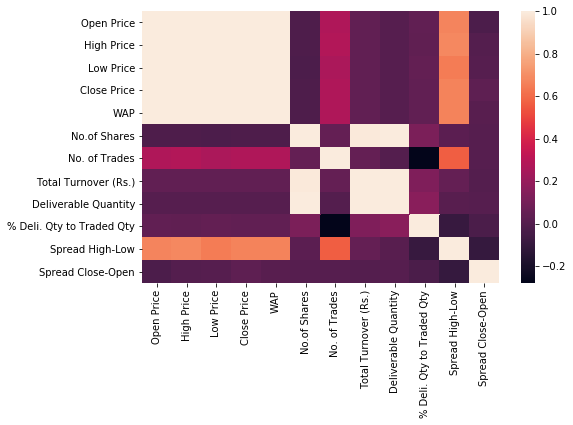

In [11]:
plt.figure(figsize = (8,5)) 
sns.heatmap(corr)

In [12]:
columns = np.full((corr.shape[0],), False, dtype=bool)
for i in range(corr.shape[1]):
    if corr.iloc[3,i] >= 0.3 and corr.iloc[3,i] < 1:
        columns[i] = True
selected_columns = rel.columns[columns]

In [13]:
rel = rel[selected_columns]

## Training and Test Data Preparation 

In [14]:
X=rel.to_numpy()

In [15]:
Y=rel_data['Close Price'].to_numpy()

In [16]:
Scaler = MinMaxScaler()
Scaler.fit(X)
X1=Scaler.transform(X)
X1.shape

(4521, 5)

In [17]:
Scaler1 = MinMaxScaler()
Y=Y.reshape(-1,1)
Scaler1.fit(Y)
Y1=Scaler1.transform(Y)
Y1.shape

(4521, 1)

In [18]:
X1=X1.reshape(X1.shape[0],1,5)

In [19]:
X_train = X1[:int(X.shape[0]*0.8)]
X_test = X1[int(X.shape[0]*0.8):]
y_train = Y1[:int(X.shape[0]*0.8)]
y_test = Y1[int(X.shape[0]*0.8):]

In [20]:
X_train=np.delete(X_train,(X_train.shape[0]-1),axis=0)

In [21]:
X_test=np.delete(X_test,(X_test.shape[0]-1),axis=0)

In [22]:
y_test=np.delete(y_test,(0),axis=0)

In [23]:
y_train=np.delete(y_train,(0),axis=0)

## Stacked LSTM Model

In [24]:
n_steps = 1
n_features = 5
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1))
AD=keras.optimizers.Adadelta(learning_rate=0.01, rho=0.87)
model.compile(optimizer=AD,loss='mse')

In [25]:
Stock1=model.fit(X_train, y_train,validation_split=0.2, epochs=180, verbose=1)

Train on 2892 samples, validate on 723 samples
Epoch 1/180
2892/2892 [==============================] - 5s 2ms/sample - loss: 0.1148 - val_loss: 0.0568
Epoch 2/180
2892/2892 [==============================] - 0s 144us/sample - loss: 0.1110 - val_loss: 0.0535
Epoch 3/180
2892/2892 [==============================] - 0s 134us/sample - loss: 0.1067 - val_loss: 0.0499
Epoch 4/180
2892/2892 [==============================] - 0s 130us/sample - loss: 0.1022 - val_loss: 0.0461
Epoch 5/180
2892/2892 [==============================] - 0s 131us/sample - loss: 0.0975 - val_loss: 0.0423
Epoch 6/180
2892/2892 [==============================] - 0s 134us/sample - loss: 0.0927 - val_loss: 0.0385
Epoch 7/180
2892/2892 [==============================] - 0s 131us/sample - loss: 0.0880 - val_loss: 0.0347
Epoch 8/180
2892/2892 [==============================] - 0s 134us/sample - loss: 0.0832 - val_loss: 0.0310
Epoch 9/180
2892/2892 [==============================] - 0s 139us/sample - loss: 0.0786 - val_loss:

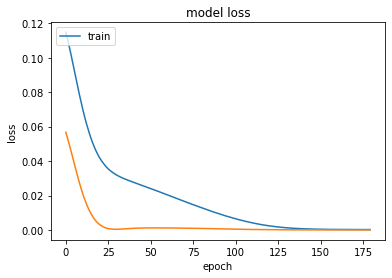

In [26]:
plt.plot(Stock1.history['loss'])
plt.plot(Stock1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
y_pr=model.predict(X_test,verbose=0)

In [28]:
y_test_corrected=Scaler1.inverse_transform(y_test)
y_pr_corrected=Scaler1.inverse_transform(y_pr)

In [29]:
y_pr_corrected[len(y_pr_corrected)-1]

array([1476.4652], dtype=float32)

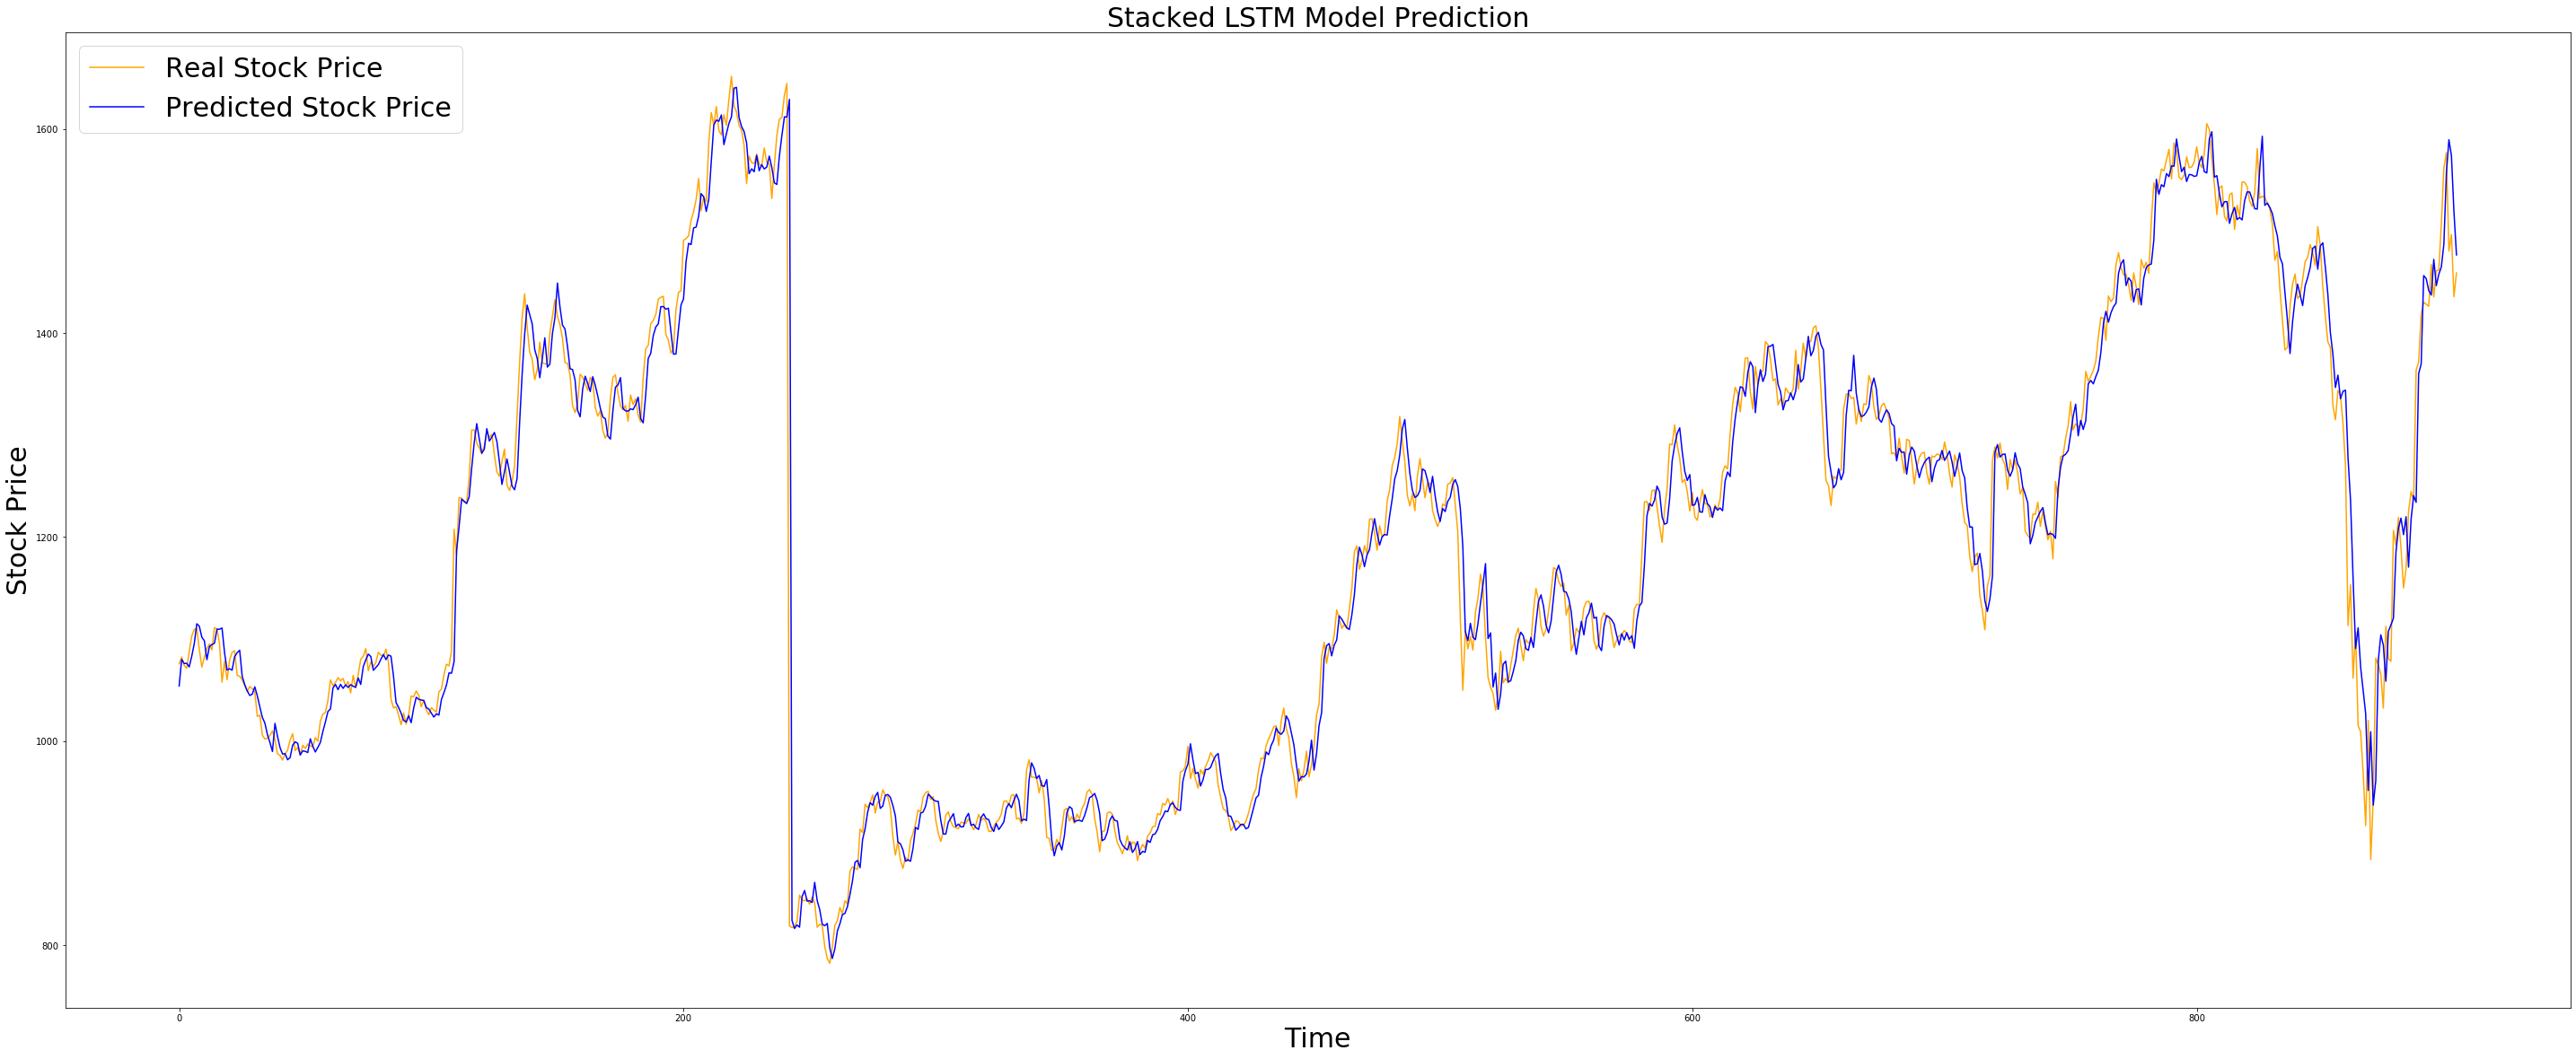

In [30]:
plt.figure(figsize=(50,20))
plt.plot(y_test_corrected, color = 'orange', label = 'Real Stock Price')
plt.plot(y_pr_corrected, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel("Time",size=30)
plt.ylabel("Stock Price",size=30)
plt.title("Stacked LSTM Model Prediction",size=30)
plt.legend(loc="best",prop={'size': 30})
plt.show()

In [31]:
from sklearn.metrics import r2_score

In [32]:
Acy=r2_score(y_test, y_pr)*100
print("Accuracy for the project:" )
Acy

Accuracy for the project:


96.79783247715051

## Impact Box

#### Backward Elimination for feature Selection

In [33]:
Xim=rel
Yim=Y
cols = list(rel.columns)
pmax = 1
while (len(cols)>0):
    p= []
    Ximd = Xim[cols]
    Ximd = sm.add_constant(Ximd)
    model = sm.OLS(Yim,Ximd).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Open Price', 'High Price', 'Low Price', 'WAP', 'Spread High-Low']


In [34]:
n_steps = 1
new_n_features = 2
New_model = Sequential()
New_model.add(LSTM(55, activation='tanh', return_sequences=True, input_shape=(n_steps, new_n_features)))
New_model.add(LSTM(55, activation='tanh'))
New_model.add(Dense(1))
New_model.compile(optimizer='Adam',loss='mse')

In [35]:
Wsave = New_model.get_weights()

#### Features to be selected from Open Price, High Price, Low Price, WAP and Spread High-Low

In [36]:
New_X1=rel_data[["Open Price","Spread High-Low"]]
X2=rel_data[["High Price","Spread High-Low"]]
X3=rel_data[["WAP","Spread High-Low"]]
X4=rel_data[["Spread High-Low","Low Price"]]
X5=rel_data[["High Price","Low Price"]]

In [37]:
n_Scaler = MinMaxScaler()
n_Scaler.fit(New_X1)
n_X1=n_Scaler.transform(New_X1)
n_X1.shape

(4521, 2)

In [38]:
n_X1=n_X1.reshape(n_X1.shape[0],1,2)
n_X1.shape

(4521, 1, 2)

In [39]:
n_Scaler = MinMaxScaler()
n_Scaler.fit(X2)
n_X2=n_Scaler.transform(X2)
n_X2.shape

(4521, 2)

In [40]:
n_X2=n_X2.reshape(X2.shape[0],1,2)

In [41]:
n_Scaler = MinMaxScaler()
n_Scaler.fit(X3)
n_X3=n_Scaler.transform(X3)
n_X3.shape

(4521, 2)

In [42]:
n_X3=n_X3.reshape(X3.shape[0],1,2)

In [43]:
n_Scaler = MinMaxScaler()
n_Scaler.fit(X4)
n_X4=n_Scaler.transform(X4)
n_X4.shape

(4521, 2)

In [44]:
n_X4=n_X4.reshape(X4.shape[0],1,2)

In [45]:
n_Scaler = MinMaxScaler()
n_Scaler.fit(X5)
n_X5=n_Scaler.transform(X5)
n_X5.shape

(4521, 2)

In [46]:
n_X5=n_X5.reshape(X5.shape[0],1,2)

In [47]:
new_y_train = Y1[:int(X.shape[0]*0.7)]
new_y_test = Y1[int(X.shape[0]*0.7):]

In [48]:
new_X1_train = n_X1[:int(n_X1.shape[0]*0.7)]
new_X1_test = n_X1[int(n_X1.shape[0]*0.7):]

In [49]:
new_X2_train = n_X2[:int(n_X2.shape[0]*0.7)]
new_X2_test = n_X2[int(n_X2.shape[0]*0.7):]

In [50]:
new_X3_train = n_X3[:int(n_X3.shape[0]*0.7)]
new_X3_test = n_X3[int(n_X3.shape[0]*0.7):]

In [51]:
new_X4_train = n_X4[:int(n_X4.shape[0]*0.7)]
new_X4_test = n_X4[int(n_X4.shape[0]*0.7):]

In [52]:
new_X5_train = n_X5[:int(n_X5.shape[0]*0.7)]
new_X5_test = n_X5[int(n_X5.shape[0]*0.7):]

In [53]:
new_y_test=np.delete(new_y_test,(0),axis=0)

In [54]:
new_y_train=np.delete(new_y_train,(0),axis=0)

In [55]:
new_X1_train=np.delete(new_X1_train,(new_X1_train.shape[0]-1),axis=0)

In [56]:
new_X2_train=np.delete(new_X2_train,(new_X2_train.shape[0]-1),axis=0)

In [57]:
new_X3_train=np.delete(new_X3_train,(new_X3_train.shape[0]-1),axis=0)

In [58]:
new_X4_train=np.delete(new_X4_train,(new_X4_train.shape[0]-1),axis=0)

In [59]:
new_X5_train=np.delete(new_X5_train,(new_X5_train.shape[0]-1),axis=0)

#### First Subset -> Open Price and Spread High-Low

In [60]:
IB1=New_model.fit(new_X1_train,new_y_train,epochs=55,validation_split=0.15,verbose=1)

Train on 2688 samples, validate on 475 samples
Epoch 1/55
2688/2688 [==============================] - 5s 2ms/sample - loss: 0.0457 - val_loss: 7.7401e-04
Epoch 2/55
2688/2688 [==============================] - 0s 119us/sample - loss: 0.0034 - val_loss: 3.7527e-04
Epoch 3/55
2688/2688 [==============================] - 0s 121us/sample - loss: 0.0012 - val_loss: 3.0111e-04
Epoch 4/55
2688/2688 [==============================] - 0s 120us/sample - loss: 7.6037e-04 - val_loss: 7.0987e-05
Epoch 5/55
2688/2688 [==============================] - 0s 110us/sample - loss: 5.4595e-04 - val_loss: 6.0588e-05
Epoch 6/55
2688/2688 [==============================] - 0s 117us/sample - loss: 4.4112e-04 - val_loss: 5.9261e-05
Epoch 7/55
2688/2688 [==============================] - 0s 118us/sample - loss: 3.8373e-04 - val_loss: 7.5095e-05
Epoch 8/55
2688/2688 [==============================] - 0s 117us/sample - loss: 3.5544e-04 - val_loss: 5.9337e-05
Epoch 9/55
2688/2688 [==============================] -

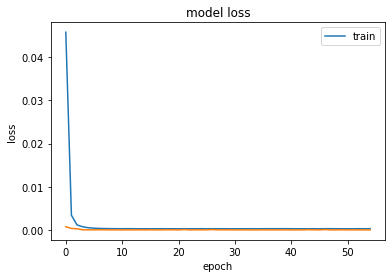

In [61]:
plt.plot(IB1.history['loss'])
plt.plot(IB1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

In [62]:
new_y1_pr=New_model.predict(new_X1_test,verbose=0)

In [63]:
new_y_test_corrected=Scaler1.inverse_transform(new_y_test)

In [64]:
new_y1_pr_corr=Scaler1.inverse_transform(new_y1_pr)

In [65]:
temp1=new_y1_pr_corr[new_y1_pr_corr.shape[0]-1]
new_y1_pr_corr=np.delete(new_y1_pr_corr,(new_y1_pr_corr.shape[0]-1),axis=0)

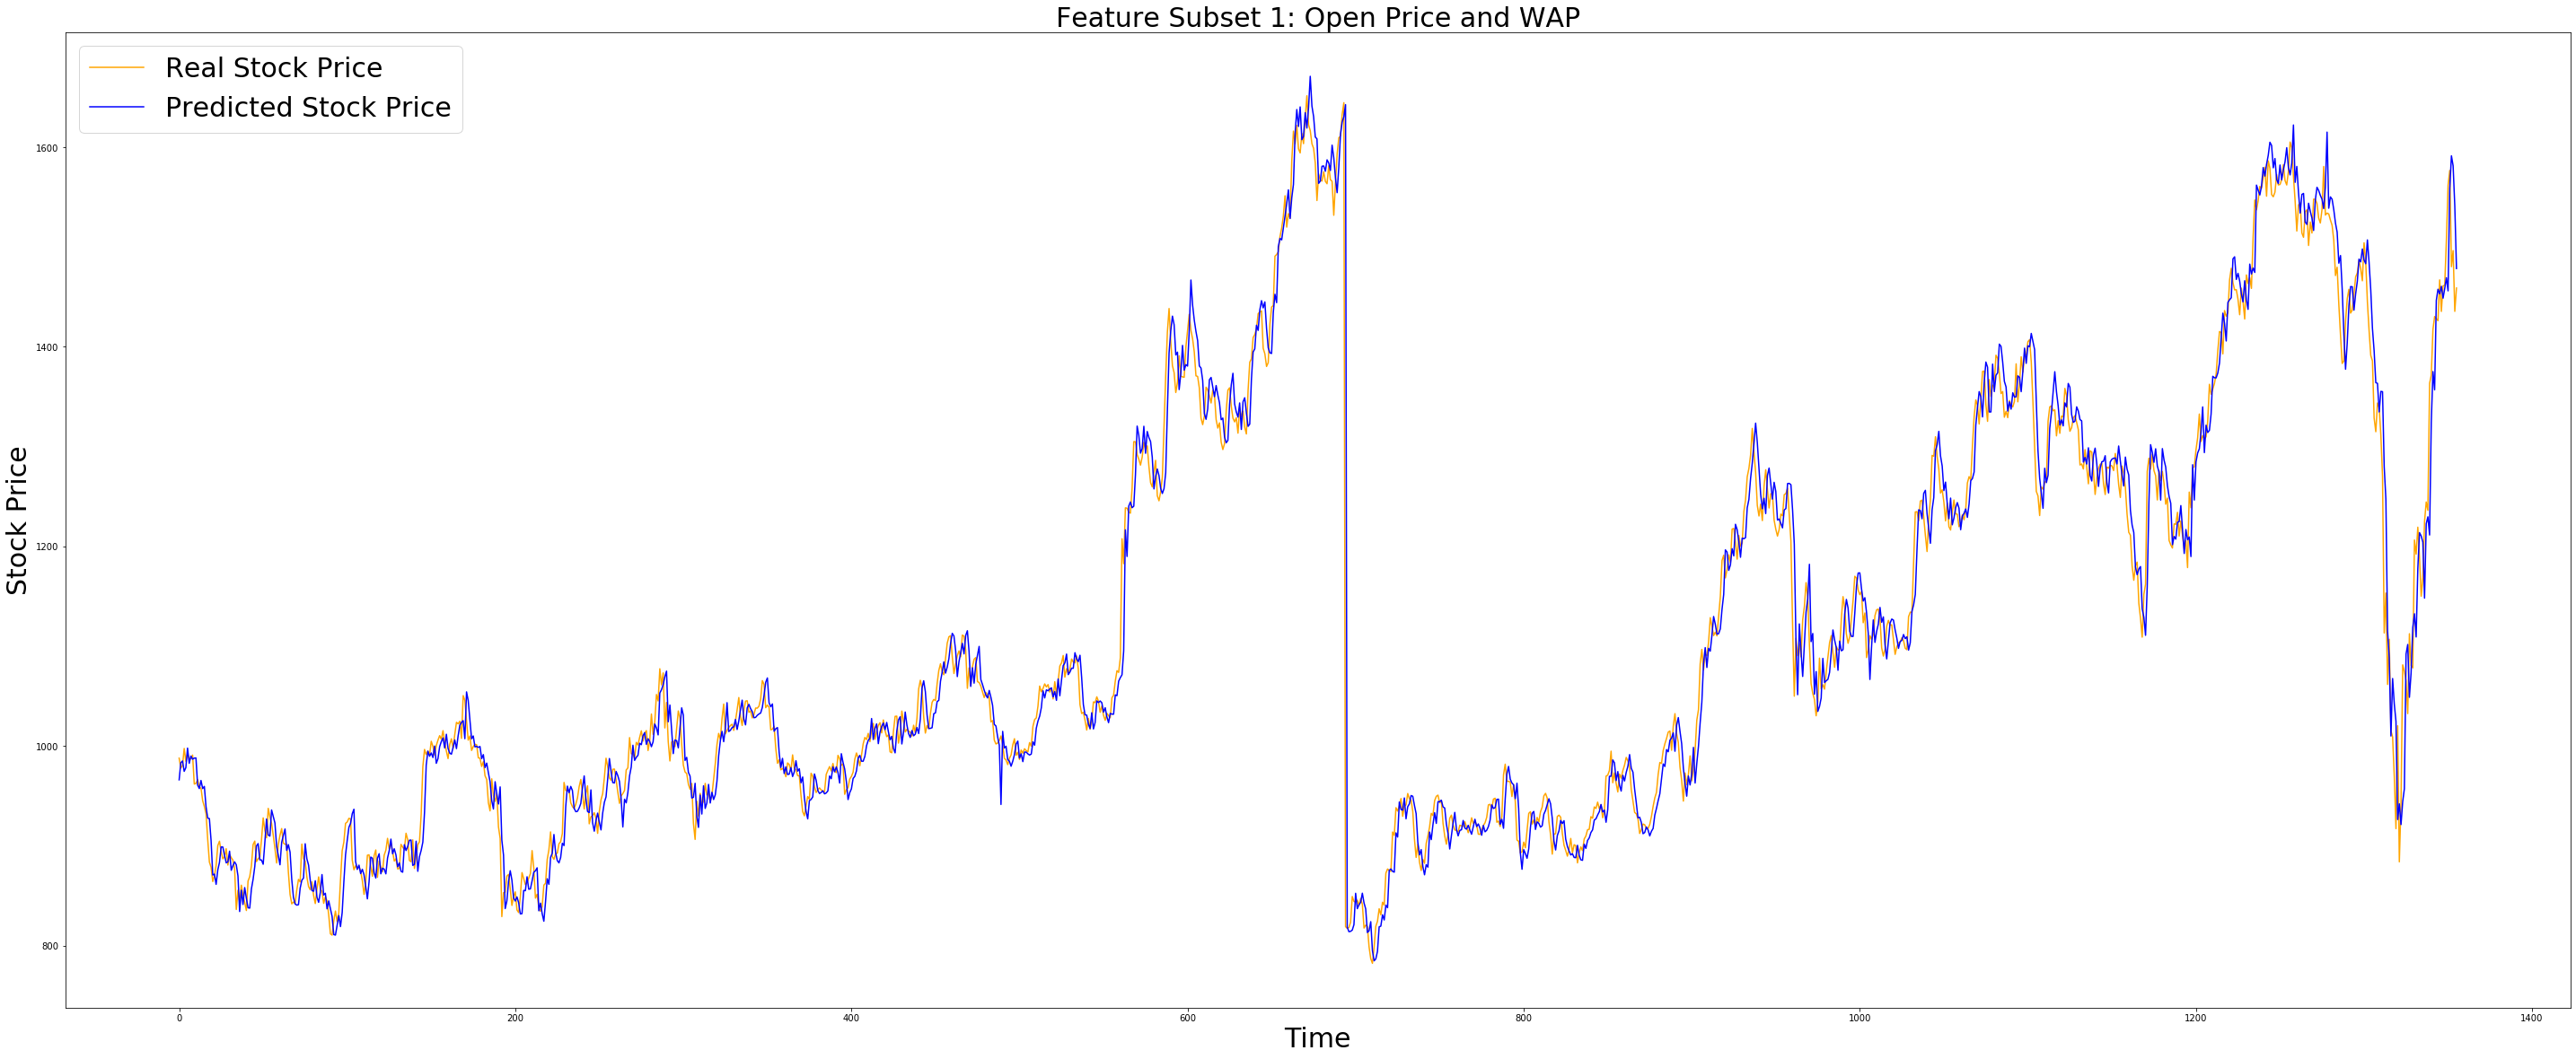

In [66]:
plt.figure(figsize=(50,20))
plt.plot(new_y_test_corrected, color = 'orange', label = 'Real Stock Price')
plt.plot(new_y1_pr_corr, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel("Time",size=30)
plt.ylabel("Stock Price",size=30)
plt.title("Feature Subset 1: Open Price and WAP",size=30)
plt.legend(loc="best",prop={'size': 30})
plt.show()

In [67]:
j=0
Acc={}
tom={}
tod={}
Acc[j]=r2_score(new_y_test_corrected, new_y1_pr_corr)*100
tom[j]=temp1
tod[j]=new_y1_pr_corr[new_y1_pr_corr.shape[0]-1]
print("Accuracy for the project:" )
print(Acc[j],j)
j=j+1

Accuracy for the project:
97.07291798779029 0


In [68]:
New_model.set_weights(Wsave)

#### Second Subset -> High Price and Spread High-Low

In [69]:
IB2=New_model.fit(new_X2_train,new_y_train,epochs=55,validation_split=0.15,verbose=1)

Train on 2688 samples, validate on 475 samples
Epoch 1/55
2688/2688 [==============================] - 0s 147us/sample - loss: 0.0177 - val_loss: 1.4850e-04
Epoch 2/55
2688/2688 [==============================] - 0s 126us/sample - loss: 4.1547e-04 - val_loss: 4.5126e-05
Epoch 3/55
2688/2688 [==============================] - 0s 123us/sample - loss: 2.5380e-04 - val_loss: 3.6671e-05
Epoch 4/55
2688/2688 [==============================] - 0s 146us/sample - loss: 2.2447e-04 - val_loss: 4.6106e-05
Epoch 5/55
2688/2688 [==============================] - 0s 126us/sample - loss: 2.1921e-04 - val_loss: 2.7118e-05
Epoch 6/55
2688/2688 [==============================] - 0s 116us/sample - loss: 2.1477e-04 - val_loss: 3.7833e-05
Epoch 7/55
2688/2688 [==============================] - 0s 115us/sample - loss: 2.1784e-04 - val_loss: 2.9837e-05
Epoch 8/55
2688/2688 [==============================] - 0s 108us/sample - loss: 2.2319e-04 - val_loss: 7.2005e-05
Epoch 9/55
2688/2688 [=======================

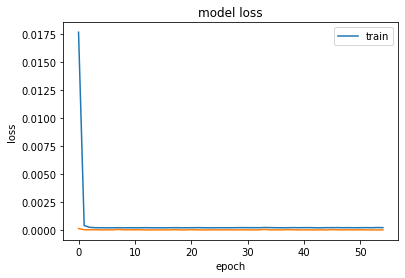

In [70]:
plt.plot(IB2.history['loss'])
plt.plot(IB2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

In [71]:
new_y2_pr=New_model.predict(new_X2_test,verbose=0)

In [72]:
new_y2_pr_corr=Scaler1.inverse_transform(new_y2_pr)

In [73]:
temp2=new_y2_pr_corr[new_y2_pr_corr.shape[0]-1]
new_y2_pr_corr=np.delete(new_y2_pr_corr,(new_y2_pr_corr.shape[0]-1),axis=0)

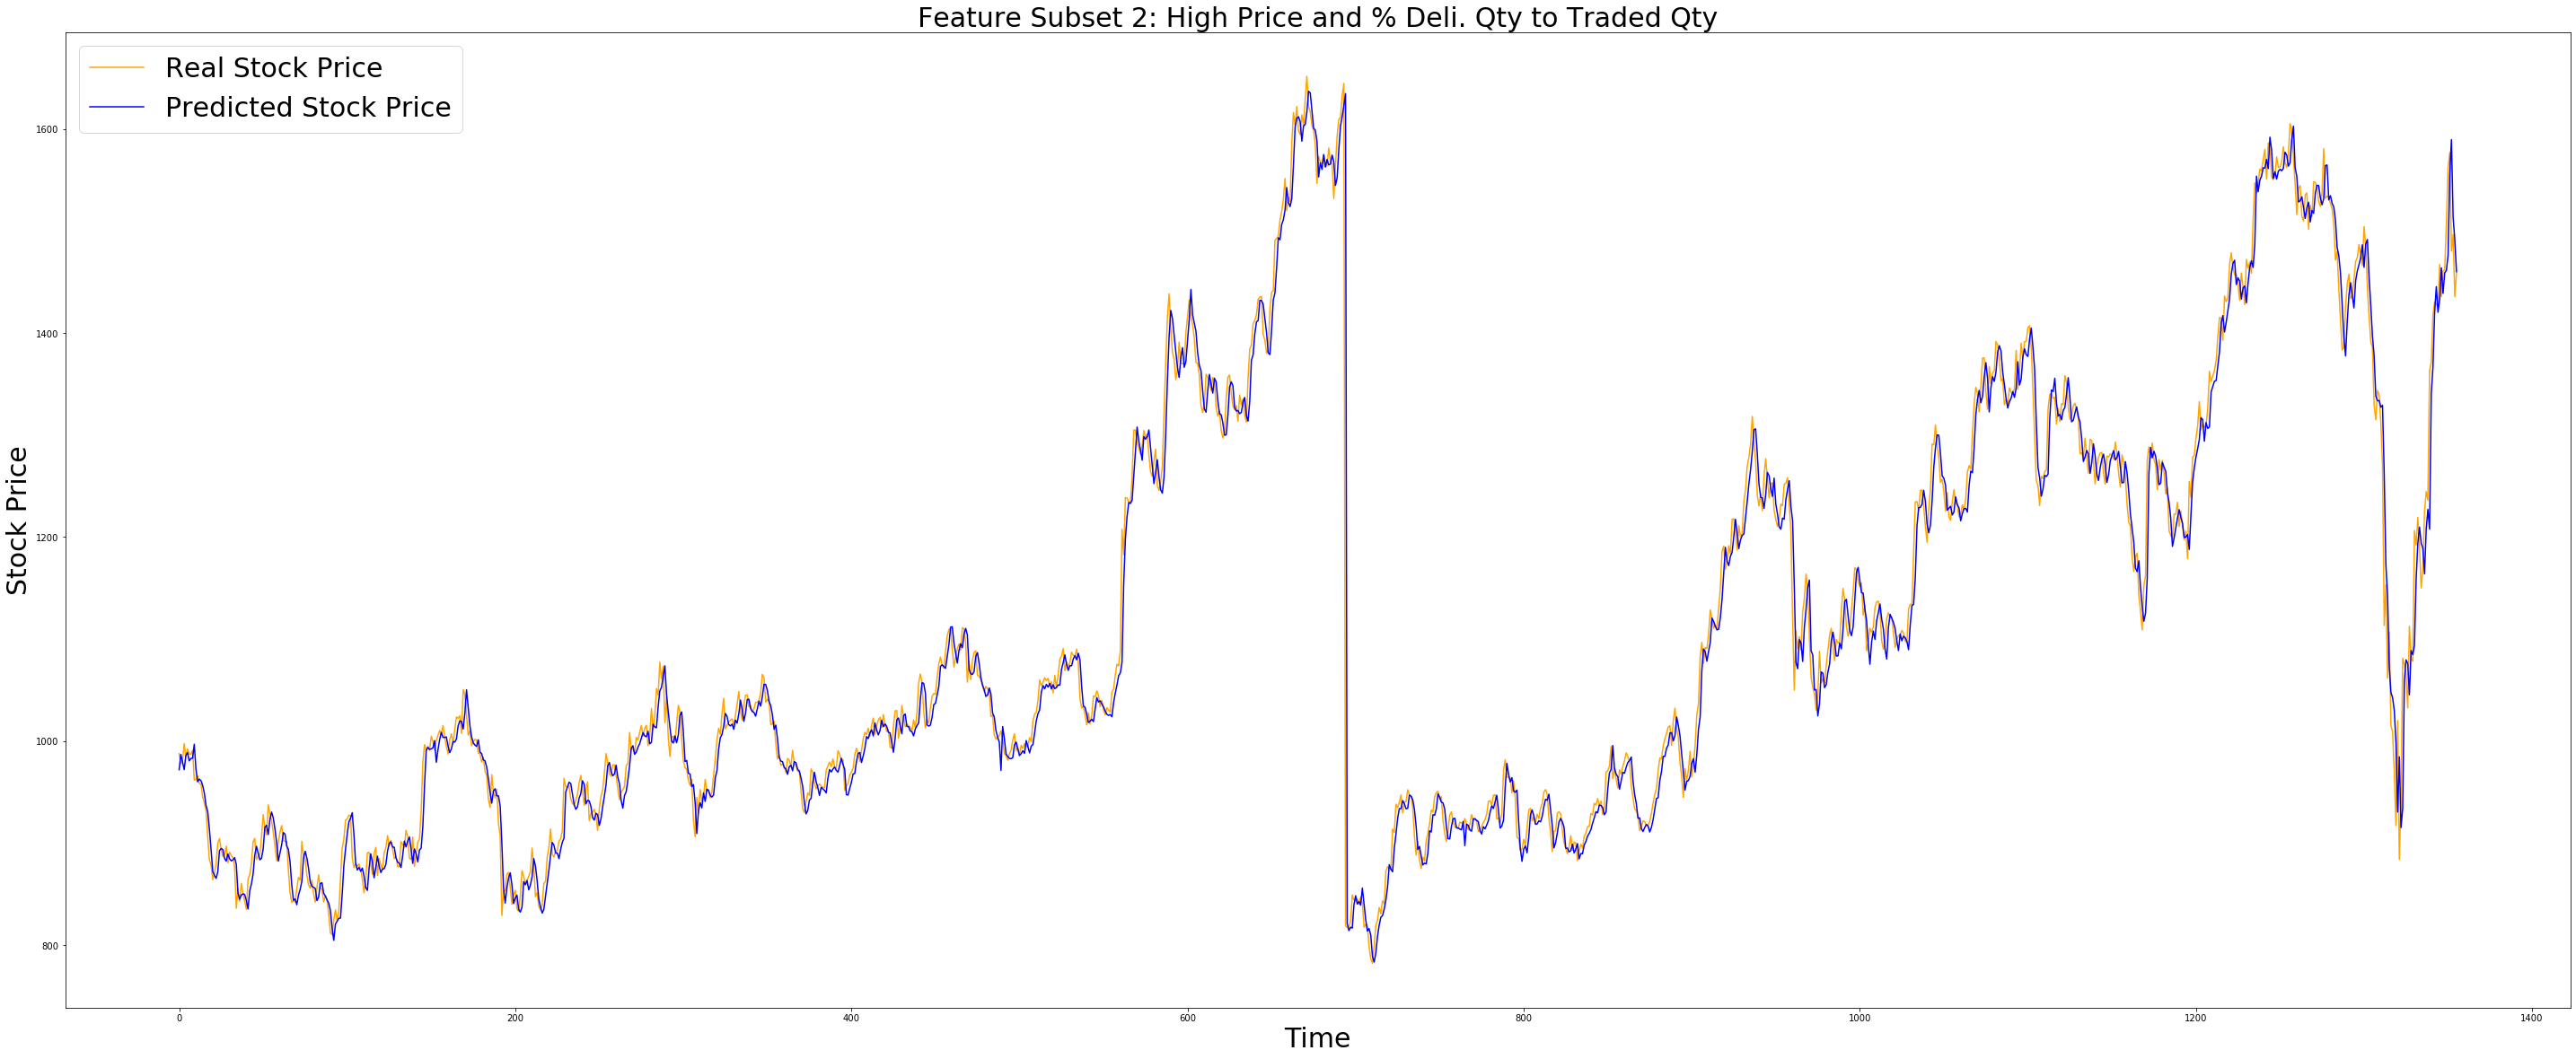

In [74]:
plt.figure(figsize=(50,20))
plt.plot(new_y_test_corrected, color = 'orange', label = 'Real Stock Price')
plt.plot(new_y2_pr_corr, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel("Time",size=30)
plt.ylabel("Stock Price",size=30)
plt.title("Feature Subset 2: High Price and % Deli. Qty to Traded Qty",size=30)
plt.legend(loc="best",prop={'size': 30})
plt.show()

In [75]:
Acc[j]=r2_score(new_y_test_corrected, new_y2_pr_corr)*100
print("Accuracy for the project:" )
print(Acc[j])
tom[j]=temp2
tod[j]=new_y2_pr_corr[new_y2_pr_corr.shape[0]-1]
j=j+1

Accuracy for the project:
97.71406169290722


In [76]:
New_model.set_weights(Wsave)

#### Third Subset -> WAP and Spread High-Low

In [77]:
IB3=New_model.fit(new_X3_train,new_y_train,epochs=55,validation_split=0.15,verbose=1)

Train on 2688 samples, validate on 475 samples
Epoch 1/55
2688/2688 [==============================] - 0s 139us/sample - loss: 0.0154 - val_loss: 2.1452e-04
Epoch 2/55
2688/2688 [==============================] - 0s 139us/sample - loss: 2.8729e-04 - val_loss: 5.1822e-05
Epoch 3/55
2688/2688 [==============================] - 0s 123us/sample - loss: 2.2098e-04 - val_loss: 2.6190e-05
Epoch 4/55
2688/2688 [==============================] - 0s 128us/sample - loss: 2.0556e-04 - val_loss: 2.5101e-05
Epoch 5/55
2688/2688 [==============================] - 0s 134us/sample - loss: 2.0364e-04 - val_loss: 4.3598e-05
Epoch 6/55
2688/2688 [==============================] - 0s 128us/sample - loss: 1.9911e-04 - val_loss: 2.6125e-05
Epoch 7/55
2688/2688 [==============================] - 0s 122us/sample - loss: 2.0795e-04 - val_loss: 2.5335e-05
Epoch 8/55
2688/2688 [==============================] - 0s 118us/sample - loss: 2.0721e-04 - val_loss: 2.7338e-05
Epoch 9/55
2688/2688 [=======================

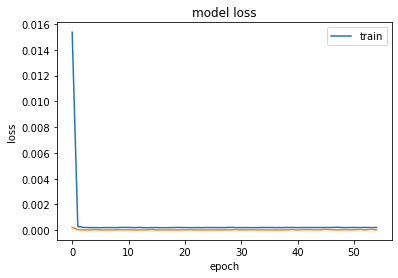

In [78]:
plt.plot(IB3.history['loss'])
plt.plot(IB3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

In [79]:
new_y3_pr=New_model.predict(new_X3_test,verbose=0)

In [80]:
new_y3_pr_corr=Scaler1.inverse_transform(new_y3_pr)

In [81]:
temp3=new_y3_pr_corr[new_y3_pr_corr.shape[0]-1]
new_y3_pr_corr=np.delete(new_y3_pr_corr,(new_y3_pr_corr.shape[0]-1),axis=0)

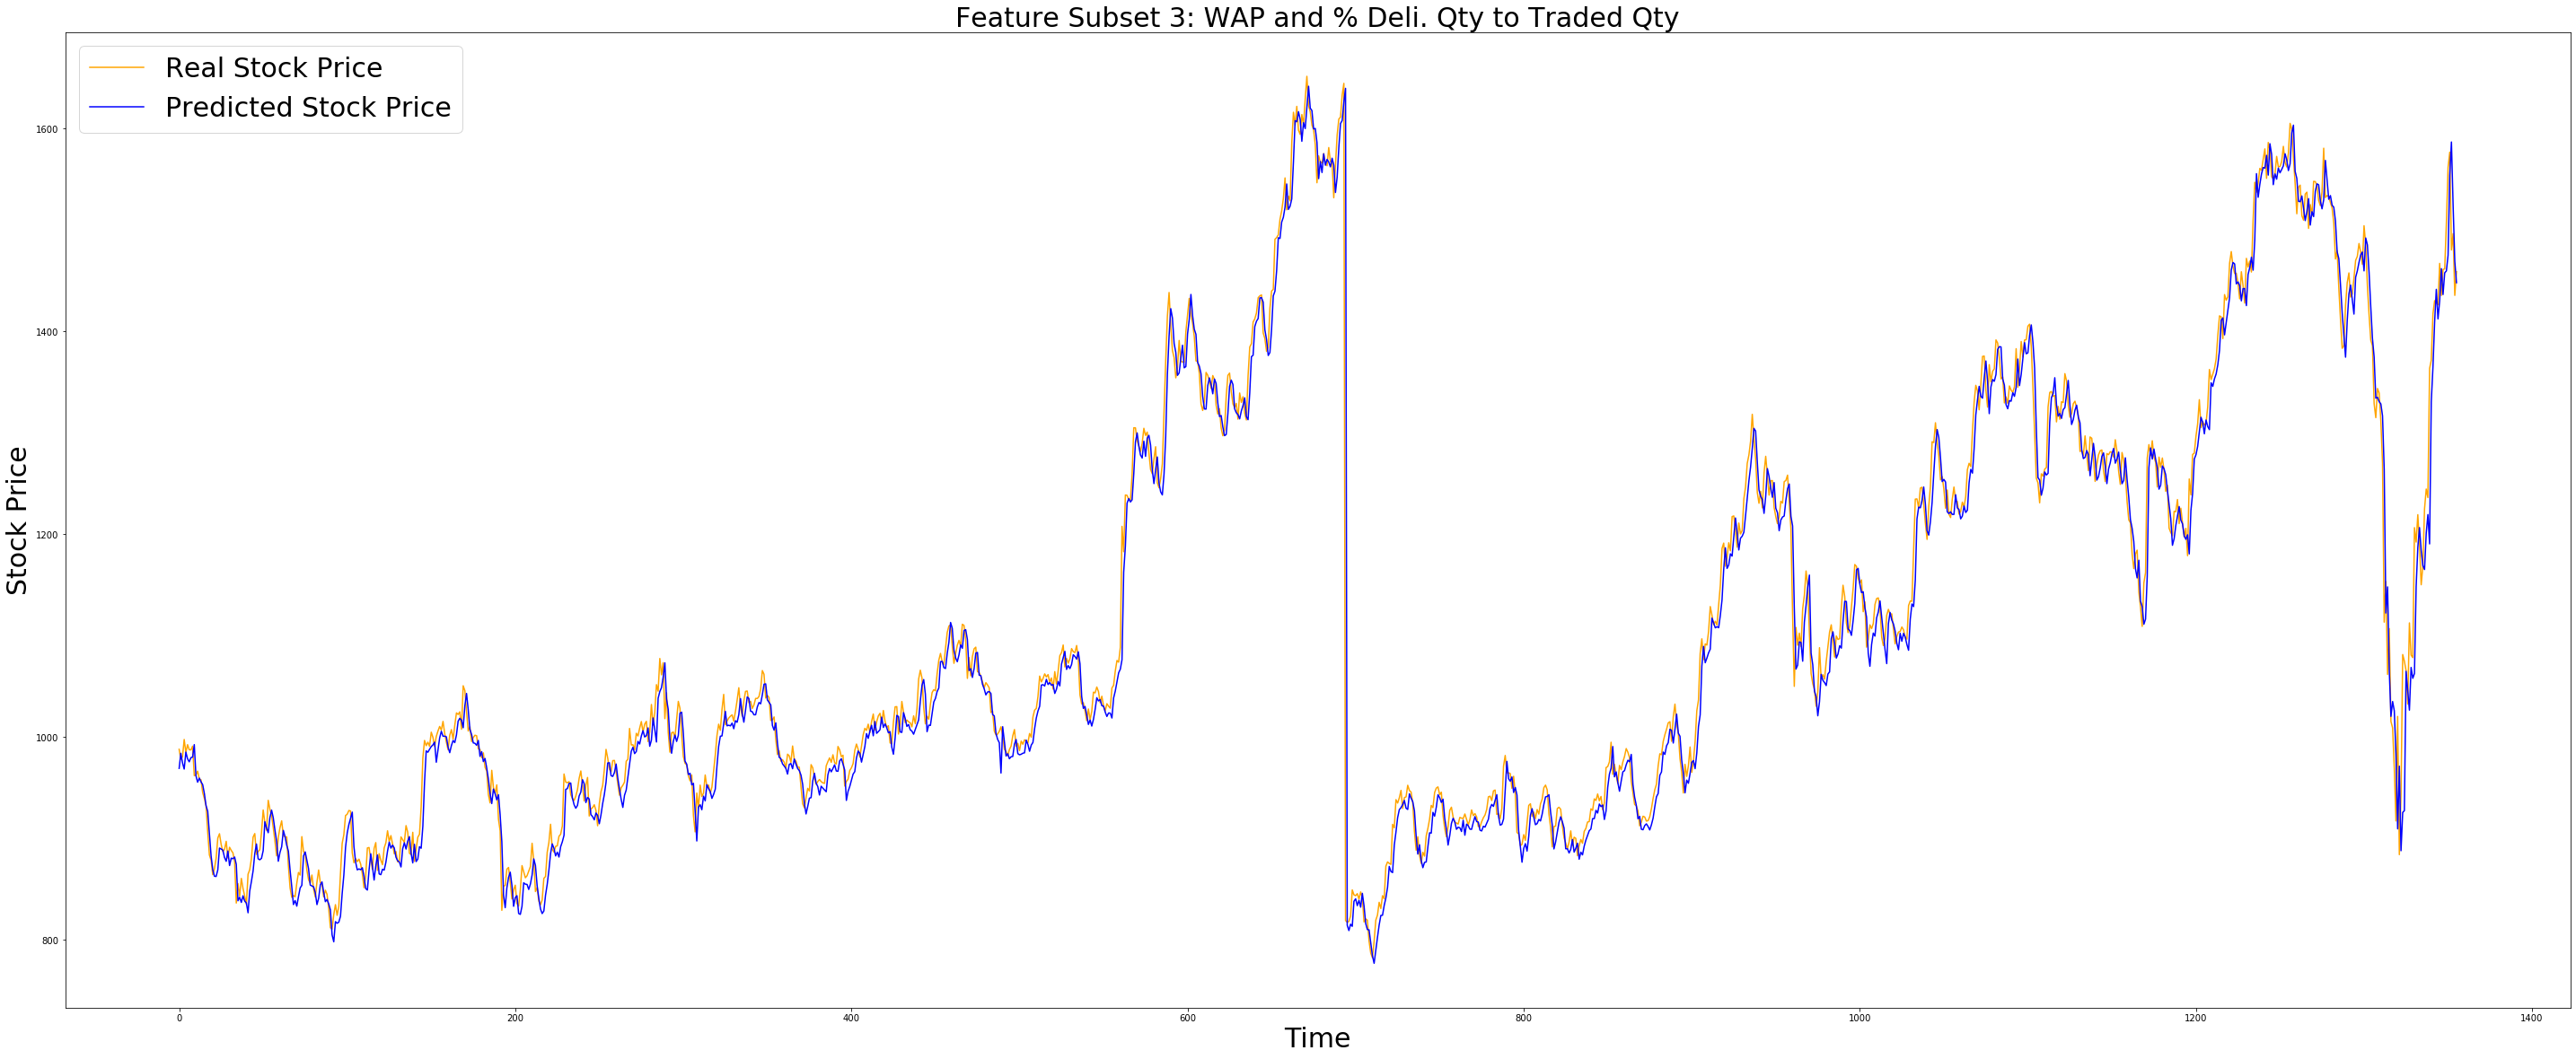

In [82]:
plt.figure(figsize=(50,20))
plt.plot(new_y_test_corrected, color = 'orange', label = 'Real Stock Price')
plt.plot(new_y3_pr_corr, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel("Time",size=30)
plt.ylabel("Stock Price",size=30)
plt.title("Feature Subset 3: WAP and % Deli. Qty to Traded Qty",size=30)
plt.legend(loc="best",prop={'size': 30})
plt.show()

In [83]:
Acc[j]=r2_score(new_y_test_corrected, new_y3_pr_corr)*100
print("Accuracy for the project:" )
print(Acc[j])
tom[j]=temp3
tod[j]=new_y3_pr_corr[new_y3_pr_corr.shape[0]-1]
j=j+1

Accuracy for the project:
97.58672393470896


In [84]:
New_model.set_weights(Wsave)

#### Fourth Subset -> Low Price and Spread High-Low

In [85]:
IB4=New_model.fit(new_X4_train,new_y_train,epochs=55,validation_split=0.15,verbose=1)

Train on 2688 samples, validate on 475 samples
Epoch 1/55
2688/2688 [==============================] - 0s 130us/sample - loss: 0.0142 - val_loss: 1.1922e-04
Epoch 2/55
2688/2688 [==============================] - 0s 147us/sample - loss: 3.3030e-04 - val_loss: 3.3046e-05
Epoch 3/55
2688/2688 [==============================] - 0s 134us/sample - loss: 2.4966e-04 - val_loss: 3.7969e-05
Epoch 4/55
2688/2688 [==============================] - 0s 132us/sample - loss: 2.2089e-04 - val_loss: 2.7192e-05
Epoch 5/55
2688/2688 [==============================] - 0s 127us/sample - loss: 2.1535e-04 - val_loss: 3.1003e-05
Epoch 6/55
2688/2688 [==============================] - 0s 126us/sample - loss: 2.1875e-04 - val_loss: 2.8817e-05
Epoch 7/55
2688/2688 [==============================] - 0s 125us/sample - loss: 2.1559e-04 - val_loss: 4.0564e-05
Epoch 8/55
2688/2688 [==============================] - 0s 138us/sample - loss: 2.2704e-04 - val_loss: 6.4088e-05
Epoch 9/55
2688/2688 [=======================

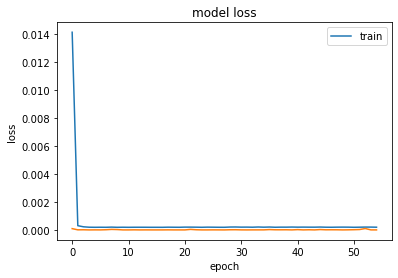

In [86]:
plt.plot(IB4.history['loss'])
plt.plot(IB4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

In [87]:
new_y4_pr=New_model.predict(new_X4_test,verbose=0)

In [88]:
new_y4_pr_corr=Scaler1.inverse_transform(new_y4_pr)

In [89]:
temp4=new_y4_pr_corr[new_y4_pr_corr.shape[0]-1]
new_y4_pr_corr=np.delete(new_y4_pr_corr,(new_y4_pr_corr.shape[0]-1),axis=0)

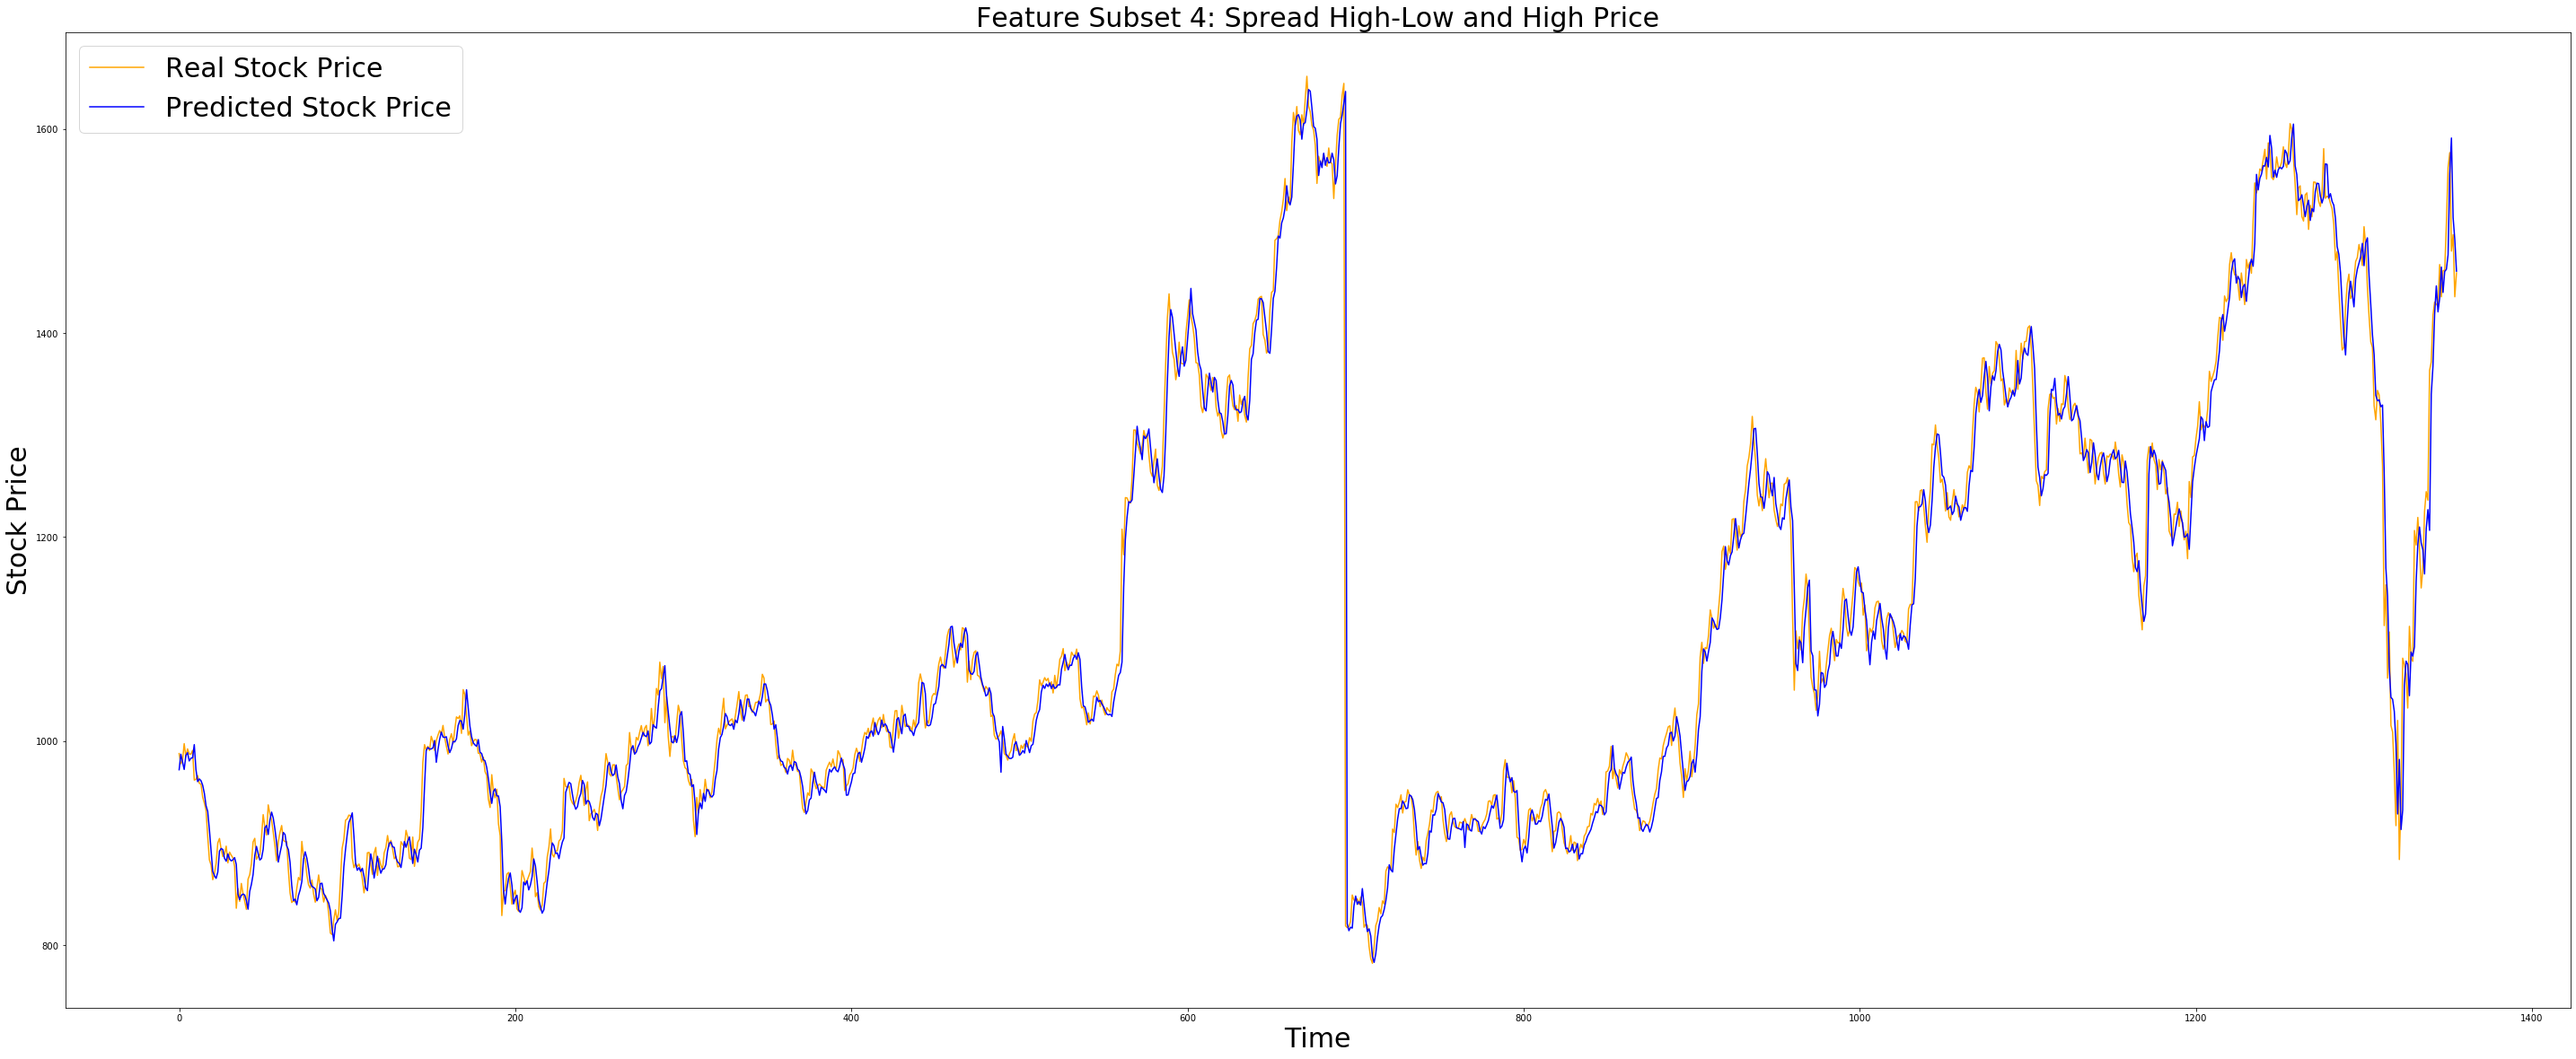

In [90]:
plt.figure(figsize=(50,20))
plt.plot(new_y_test_corrected, color = 'orange', label = 'Real Stock Price')
plt.plot(new_y4_pr_corr, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel("Time",size=30)
plt.ylabel("Stock Price",size=30)
plt.title("Feature Subset 4: Spread High-Low and High Price",size=30)
plt.legend(loc="best",prop={'size': 30})
plt.show()

In [91]:
Acc[j]=(r2_score(new_y_test_corrected, new_y4_pr_corr)*100)
print("Accuracy for the project:" )
print(Acc[j],j)
tom[j]=temp4
tod[j]=new_y4_pr_corr[new_y4_pr_corr.shape[0]-1]
j=j+1

Accuracy for the project:
97.71045571632214 3


In [92]:
New_model.set_weights(Wsave)

#### Fifth Subset -> High Price and Low Price

In [93]:
IB5=New_model.fit(new_X5_train,new_y_train,epochs=55,validation_split=0.15,verbose=1)

Train on 2688 samples, validate on 475 samples
Epoch 1/55
2688/2688 [==============================] - 0s 144us/sample - loss: 0.0128 - val_loss: 1.3965e-04
Epoch 2/55
2688/2688 [==============================] - 0s 138us/sample - loss: 2.7844e-04 - val_loss: 3.4289e-05
Epoch 3/55
2688/2688 [==============================] - 0s 136us/sample - loss: 2.3012e-04 - val_loss: 4.3228e-05
Epoch 4/55
2688/2688 [==============================] - 0s 135us/sample - loss: 2.2046e-04 - val_loss: 2.8414e-05
Epoch 5/55
2688/2688 [==============================] - 0s 134us/sample - loss: 2.1586e-04 - val_loss: 3.1295e-05
Epoch 6/55
2688/2688 [==============================] - 0s 130us/sample - loss: 2.2434e-04 - val_loss: 3.2950e-05
Epoch 7/55
2688/2688 [==============================] - 0s 141us/sample - loss: 2.1817e-04 - val_loss: 2.7818e-05
Epoch 8/55
2688/2688 [==============================] - 0s 124us/sample - loss: 2.1727e-04 - val_loss: 3.2829e-05
Epoch 9/55
2688/2688 [=======================

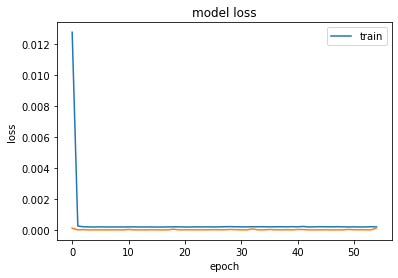

In [94]:
plt.plot(IB5.history['loss'])
plt.plot(IB5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

In [95]:
new_y5_pr=New_model.predict(new_X5_test,verbose=0)

In [96]:
new_y5_pr_corr=Scaler1.inverse_transform(new_y5_pr)

In [97]:
temp5=new_y5_pr_corr[new_y5_pr_corr.shape[0]-1]
new_y5_pr_corr=np.delete(new_y5_pr_corr,(new_y5_pr_corr.shape[0]-1),axis=0)

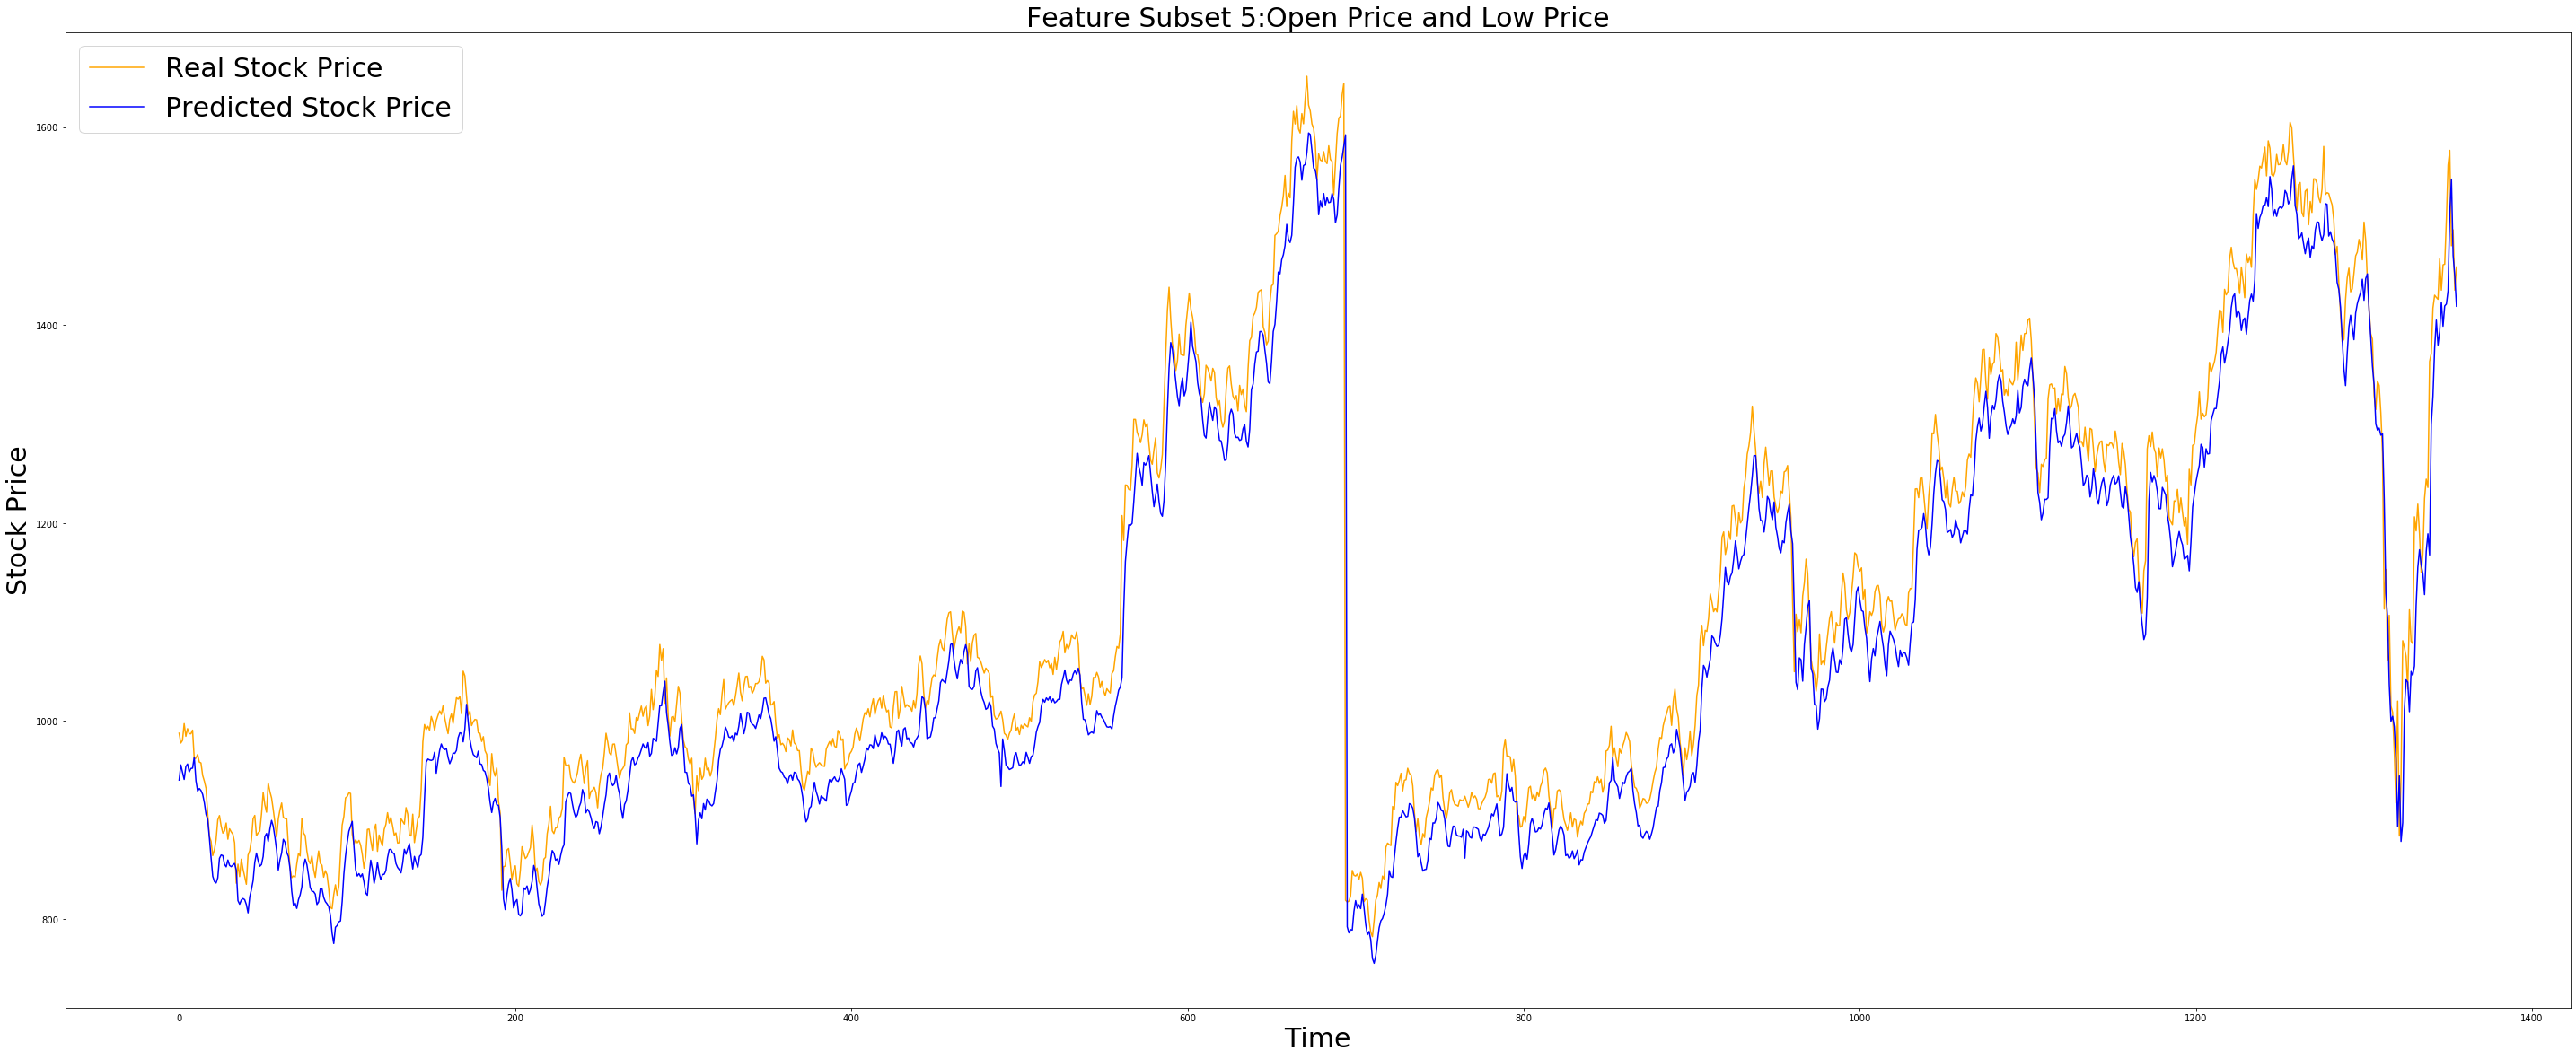

In [98]:
plt.figure(figsize=(50,20))
plt.plot(new_y_test_corrected, color = 'orange', label = 'Real Stock Price')
plt.plot(new_y5_pr_corr, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel("Time",size=30)
plt.ylabel("Stock Price",size=30)
plt.title("Feature Subset 5:Open Price and Low Price",size=30)
plt.legend(loc="best",prop={'size': 30})
plt.show()

In [99]:
Acc[j]=r2_score(new_y_test_corrected, new_y5_pr_corr)*100
print("Accuracy for the project:" )
print(Acc[j],j)
tom[j]=temp5
tod[j]=new_y5_pr_corr[new_y5_pr_corr.shape[0]-1]
n=j

Accuracy for the project:
94.59105829644507 4


### Impact Box Effect

In [100]:
Max = 0
res = (datetime.datetime.strptime(date[0], '%d-%b-%Y') + datetime.timedelta(days=1)).strftime('%d-%b-%Y')
real=new_y_test_corrected[new_y_test_corrected.shape[0]-1]
for r in range(n+1):
      if Acc[r] > Acy and Max < Acc[r]:
        Max=Acc[r]
        pred_value=tom[j]
        current=tod[j]
if Max != Acy:
    print("Impact Box has helped to increase accuracy")
    print("Increased accuracy of the project is ",Max)
    print("Predicted value of stock for",res) 
    print(float(pred_value))
    print("Predicted value for",date[0])
    print(float(current))
    print("Actual value for",date[0])
    print(float(real))

Impact Box has helped to increase accuracy
Increased accuracy of the project is  97.71406169290722
Predicted value of stock for 16-May-2020
1397.817626953125
Predicted value for 15-May-2020
1419.162109375
Actual value for 15-May-2020
1458.9
